C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


('happy', 1.0)


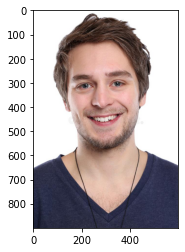

In [3]:
from fer import FER
import matplotlib.pyplot as plt 
img = plt.imread(r"E:\image_data\happy2.jpg")
detector = FER(mtcnn=True)
print(detector.top_emotion(img))
plt.imshow(img)
plt.show()

[{'box': (78, 133, 421, 421), 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 1.0, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.0}}]


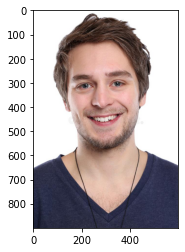

In [14]:
from fer import FER
import matplotlib.pyplot as plt 
img = plt.imread(r"E:\image_data\happy2.jpg")
detector = FER(mtcnn=True)
print(detector.detect_emotions(img))
plt.imshow(img)
plt.show()

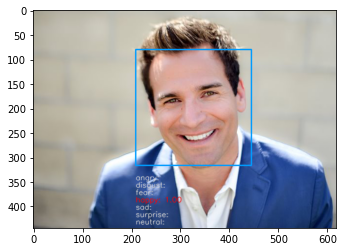

In [9]:
import cv2
from fer import FER
detector = FER(mtcnn=True) 
image = plt.imread(r"E:\image_data\happy3.jpg")
result = detector.detect_emotions(image)
bb = result[0]["box"]
emotions = result[0]["emotions"]
cv2.rectangle(image,(bb[0], bb[1]),(bb[0] + bb[2], bb[1] + bb[3]),(0, 155, 255), 2,)

for idx, (emotion, score) in enumerate(emotions.items()):
    color = (211, 211, 211) if score < 0.01 else (255, 0, 0)
    emotion_score = "{}: {}".format(
          emotion, "{:.2f}".format(score) if score > 0.01 else ""
        )
    cv2.putText(image,emotion_score,
            (bb[0], bb[1] + bb[3] + 30 + idx * 15),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1,cv2.LINE_AA,)

plt.imshow(image)
plt.show()

In [26]:
import cv2
from fer import FER
detector = FER(mtcnn=True) 



vid = cv2.VideoCapture(0)
while True:
    success,image = vid.read()
    if success==False:
        break
    result = detector.detect_emotions(image)
    if len(result)>0:
        bb = result[0]["box"]
        emotions = result[0]["emotions"]
        emotion = [i for i in list(emotions.keys()) if emotions[i]>0][0]
        w,h,c = image.shape
        cv2.rectangle(image,(bb[0], bb[1]),(bb[0] + bb[2], bb[1] + bb[3]),(0, 155, 255), 2,)
        cv2.putText(image,emotion,
                (int(0.1*w), int(0.2*h)),cv2.FONT_HERSHEY_SIMPLEX,2.5,[0,0,255],1,cv2.LINE_AA,)

    cv2.imshow("frame",image)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cv2.destroyAllWindows()
vid.release()



In [23]:
vid.release()